### This Notebook aims to run experiments to see the focus of the baseline seq2seq models for DA classification.

It was hypothesised that all the encoder has all utterance seperation information, it's hard for the decoder to know what the current utterance has to be (due to complex information overload) and this notebook looks at how much focus the decoder has for each decision.

In [1]:
import sys

sys.path.append('/home/alta/Conversational/OET/al826/2022/seq_cls')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from types import SimpleNamespace
import scipy

from src.eval_handler import EvalHandler
from src.config import config

In [3]:
from src.eval_handler import EvalHandler

#E = EvalHandler('seq2seq/bs4_lr-5_e80')
E = EvalHandler('seq2seq/led_base')

eval_path = f"{config.base_dir}/data/swda/standard/dev.json"
l_path = f"{config.base_dir}/data/swda/standard/labels.json"

args = {'test_path':eval_path,
        'bsz':1, 
        'override':False,
        'label_path':l_path, 
        'system_args':None,
        'device':'cuda:0'}

args = SimpleNamespace(**args)

cross_attentions = E.attention(args, conv_num=0, free=True)

using baseline seq2seq model


100%|██████████| 21/21 [00:00<00:00, 88.79it/s]


In [4]:
print(cross_attentions.shape)

(72, 100, 96)


In [5]:
class Test:
    def __init__(self):
        print(self)
        
a = Test()


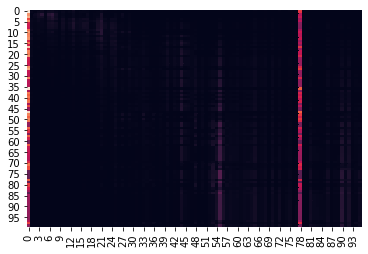

In [6]:
ax = sns.heatmap(cross_attentions[16], cbar=False)


getting average attentions over all conversations

## get the attention weights info for a specific utterance number

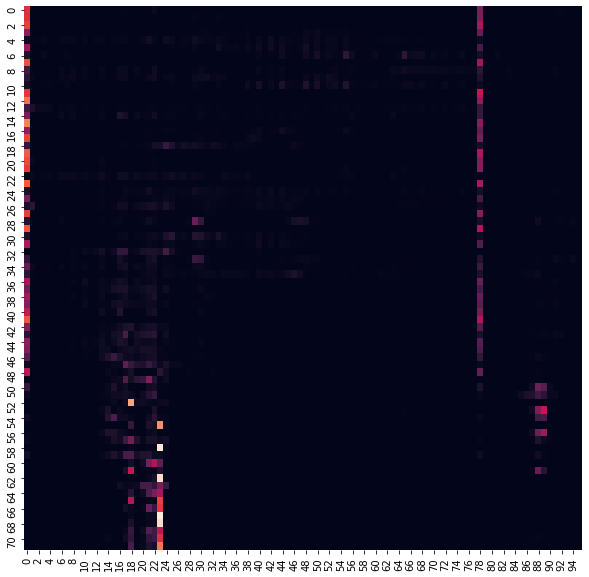

In [7]:
utt_num = 20

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
ax = sns.heatmap(cross_attentions[:,utt_num,:], cbar=False)
plt.show()

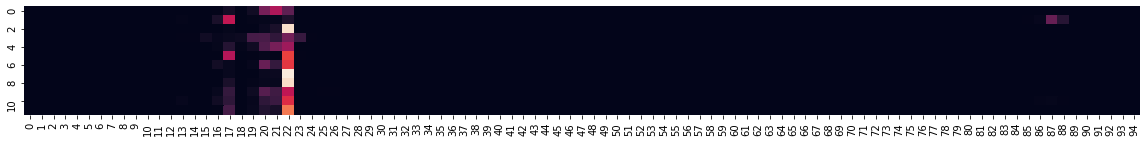

In [8]:
fig, ax = plt.subplots(figsize=(20,2))         # Sample figsize in inches
ax = sns.heatmap(cross_attentions[-12:,utt_num,1:], cbar=False)
plt.show()

(100, 96)


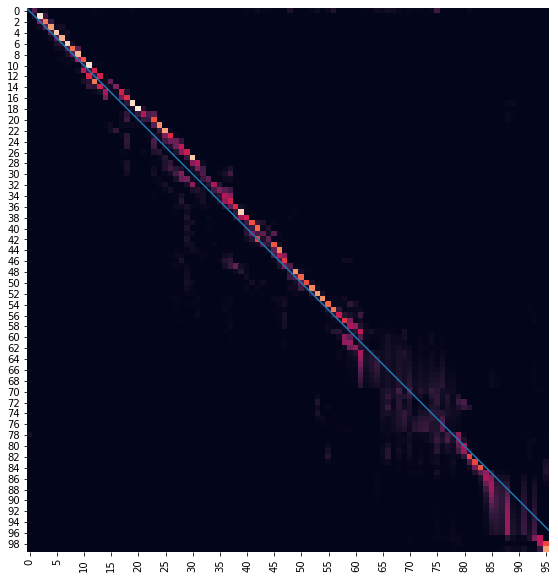

In [9]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
final_attn = np.mean(cross_attentions[-12:], axis=0)
ax = sns.heatmap(final_attn, cbar=False, square=True)

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%5!=0:
        xticks[i].set_visible(False)
        
print(final_attn.shape)
ax.axline((0, 0), slope=1)

(0.0, 98.7)

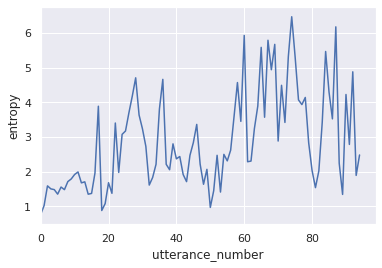

In [10]:
log_attn = np.log2(final_attn)
entropy = -1*np.sum(final_attn*log_attn, axis=0)

sns.set_theme()
plt.plot(entropy[1:])
plt.xlabel('utterance_number')
plt.ylabel('entropy')
plt.xlim(0)

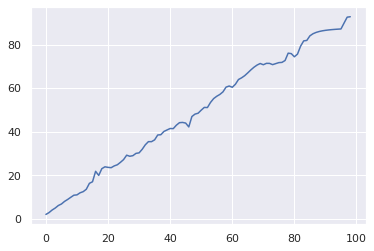

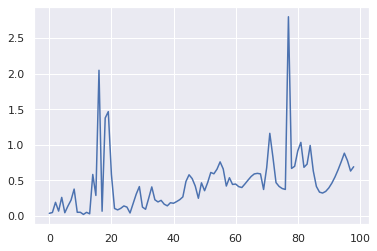

In [11]:
x = np.arange(final_attn.shape[1])
means = np.sum(x*final_attn, axis=-1)
x_squared = np.sum((x**2)*final_attn, axis=-1)
std = (x_squared - means**2)/len(final_attn)
plt.plot(means[1:])
plt.show()
plt.plot(std[1:])

## get plots for multiple conversation

In [12]:
for i in range(3):
    cross_attentions = E.attention(args, conv_num=i, utt_num=4)
    
    #look at average of finall layer
    final_attn = np.mean(cross_attentions[-12:], axis=0)
    log_attn = np.log2(final_attn)
    entropy = -1*np.sum(final_attn*log_attn, axis=0)

    sns.set_theme()
    plt.plot(entropy[1:])

plt.xlabel('utterance_number')
plt.ylabel('entropy')
plt.xlim(0, 120)
plt.ylim(0,15)

TypeError: attention() got an unexpected keyword argument 'utt_num'